<a href="https://colab.research.google.com/github/AthulyaLesslie/Health-Index-Prediction/blob/main/PROJECT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GLOBAL HEALTH INDEX SCORE PREDICTION**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('//content/drive/MyDrive/Data Science/Project-HIS Prediction/Global_HIS.csv')

# Dataset Overview & Initial Inspection






In [ ]:
df.shape

(34785, 16)

In [ ]:
df.columns

Index(['Year', 'Country', 'Disease Name', 'Disease Category',
       'Most Affected Age', 'Population Affected', 'Healthcare Access (%)',
       'Treatment Type', 'Average Treatment Cost (USD)',
       'Availability of Vaccines/Treatment', 'Education Index',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Recovery Rate (%)', 'Health Index Score'],
      dtype='object')

In [ ]:
df.head(3)

,Year,Country,Disease Name,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score
0,2023,Italy,Diabetes,Autoimmune,36-60,431948.0,88.04,Vaccination,602.0,Yes,0.76,10.62,6.28,2.62,90.47,0.735106
1,2007,South Africa,Influenza,Bacterial,61+,500411.0,81.57,Medication,14745.0,Yes,0.54,1.31,4.65,9.17,91.44,0.701330
2,2010,Saudi Arabia,Malaria,Metabolic,61+,839806.0,64.08,Medication,859.0,No,0.59,8.52,2.07,4.87,51.53,0.623462


In [ ]:
df.describe()

,Year,Population Affected,Healthcare Access (%),Average Treatment Cost (USD),Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score
count,34785.000000,34753.000000,34785.000000,34778.000000,34765.000000,34785.000000,34785.000000,34785.000000,34777.000000,34785.000000
mean,2011.895760,498569.747331,78.661988,20254.877020,0.649770,9.467754,7.332907,4.861608,79.159135,0.655192
std,7.193336,288256.650190,14.702549,14982.534609,0.144256,5.753524,4.307553,2.854471,14.745658,0.061750
min,2000.000000,1003.000000,50.000000,100.000000,0.400000,0.100000,0.100000,0.100000,50.000000,0.476473
25%,2006.000000,249221.000000,66.490000,7037.000000,0.520000,4.390000,3.570000,2.360000,66.840000,0.610208
50%,2012.000000,497277.000000,80.930000,16966.500000,0.650000,9.200000,7.240000,4.780000,82.540000,0.660104
75%,2018.000000,747773.000000,91.660000,32583.000000,0.770000,14.360000,10.990000,7.300000,92.190000,0.708903
max,2024.000000,999993.000000,100.000000,49999.000000,0.900000,20.000000,15.000000,10.000000,99.000000,0.781201


In [ ]:
categorical_columns = ['Year', 'Country', 'Disease Name', 'Disease Category',
                       'Most Affected Age', 'Treatment Type',
                       'Availability of Vaccines/Treatment']
for col in categorical_columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts(), "\n")

Column: Year
Unique values: [2023 2007 2010 2016 2019 2001 2000 2003 2004 2020 2002 2021 2017 2018
 2024 2009 2015 2011 2014 2022 2008 2013 2012 2006 2005]
Value counts:
 Year
2013    1466
2001    1457
2000    1436
2016    1433
2007    1433
2006    1425
2011    1418
2004    1416
2003    1409
2005    1401
2012    1400
2020    1399
2019    1398
2010    1396
2023    1392
2014    1386
2009    1383
2017    1383
2008    1364
2018    1353
2021    1340
2002    1336
2022    1333
2015    1320
2024    1308
Name: count, dtype: int64 

Column: Country
Unique values: ['Italy' 'South Africa' 'Saudi Arabia' 'Australia' 'Mexico' 'Turkey' 'USA'
 'Indonesia' 'China' 'France' 'Germany' 'UK' 'Brazil' 'Canada' 'Nigeria'
 'Japan' 'India' 'Argentina' 'Russia' 'South Korea']
Value counts:
 Country
Russia          1829
Saudi Arabia    1822
Turkey          1796
Brazil          1767
Japan           1759
USA             1756
South Korea     1749
Germany         1740
South Africa    1739
India           1735
Mexico

# 🛠 Data Cleaning & Preprocessing

**`🔍 Filtering Out Incorrect COVID-19 Records`**




In [ ]:
# Filter the dataset for COVID-19 data
df_covid = df[df["Disease Name"] == "COVID-19"]

# Get the count of COVID-19 cases for each year
covid_count_by_year = df_covid["Year"].value_counts().sort_index()

# Print the count of COVID-19 cases per year
print(covid_count_by_year)


Year
2000    81
2001    55
2002    64
2003    56
2004    78
2005    79
2006    78
2007    83
2008    63
2009    74
2010    73
2011    81
2012    67
2013    80
2014    62
2015    74
2016    81
2017    65
2018    82
2019    74
2020    76
2021    74
2022    60
2023    66
2024    63
Name: count, dtype: int64


In [ ]:
# Get the count of rows where Disease Name is COVID-19 and Year is less than 2019
covid_before_2019_count = len(df[(df["Disease Name"] == "COVID-19") & (df["Year"] < 2019)])

# Print the count
print(f"Number of rows with COVID-19 before 2019: {covid_before_2019_count}")


Number of rows with COVID-19 before 2019: 1376


In [ ]:
df.shape

(34785, 16)

In [ ]:
# Remove rows where Disease Name is COVID-19 and Year is less than 2019
df = df[~((df["Disease Name"] == "COVID-19") & (df["Year"] < 2019))]

# Verify that the rows have been deleted
covid_before_2019_count = len(df[(df["Disease Name"] == "COVID-19") & (df["Year"] < 2019)])

# Print the count after deletion (should be 0)
print(f"Number of rows with COVID-19 before 2019 after deletion: {covid_before_2019_count}")


Number of rows with COVID-19 before 2019 after deletion: 0


In [ ]:
df.shape

(33409, 16)

**`🔍 Handling Missing Values`**

In [ ]:
df.isnull().sum()

,0
Year,0
Country,0
Disease Name,27
Disease Category,0
Most Affected Age,43
Population Affected,31
Healthcare Access (%),0
Treatment Type,0
Average Treatment Cost (USD),7
Availability of Vaccines/Treatment,0


In [ ]:
categories = df.groupby('Disease Category')['Disease Name'].unique()
print(categories)


Disease Category
Autoimmune        [Diabetes, Asthma, Hypertension, Dengue, Zika,...
Bacterial         [Influenza, Measles, Dengue, Tuberculosis, Rab...
Cardiovascular    [Rabies, Zika, COVID-19, Parkinson's Disease, ...
Chronic           [Leprosy, Hepatitis, Diabetes, Measles, Hypert...
Genetic           [Measles, Cholera, Asthma, Malaria, Alzheimer'...
Infectious        [Measles, Ebola, Tuberculosis, Asthma, Malaria...
Metabolic         [Malaria, COVID-19, Dengue, Measles, Ebola, Po...
Neurological      [Polio, Zika, Ebola, Influenza, Parkinson's Di...
Parasitic         [Parkinson's Disease, HIV/AIDS, Dengue, Asthma...
Respiratory       [Malaria, COVID-19, Ebola, Diabetes, Influenza...
Viral             [Hepatitis, Diabetes, Cholera, Malaria, Cancer...
Name: Disease Name, dtype: object


In [ ]:
df = df.dropna(subset=['Disease Name'])


In [ ]:
df.shape

(33382, 16)

In [ ]:
mode_age_per_disease = df.groupby('Disease Name')['Most Affected Age'].agg(lambda x: x.mode()[0])
print(mode_age_per_disease)


Disease Name
Alzheimer's Disease     0-18
Asthma                 19-35
COVID-19               36-60
Cancer                 19-35
Cholera                19-35
Dengue                 36-60
Diabetes                 61+
Ebola                  19-35
HIV/AIDS               19-35
Hepatitis              19-35
Hypertension            0-18
Influenza              36-60
Leprosy                19-35
Malaria                 0-18
Measles                36-60
Parkinson's Disease    36-60
Polio                  36-60
Rabies                 19-35
Tuberculosis             61+
Zika                   19-35
Name: Most Affected Age, dtype: object


In [ ]:
df['Most Affected Age'] = df.apply(lambda row: mode_age_per_disease[row['Disease Name']] if pd.isna(row['Most Affected Age']) else row['Most Affected Age'], axis=1)


In [ ]:
mean_population = df.groupby(['Country', 'Disease Name'])['Population Affected'].transform('mean')
df['Population Affected'] = df['Population Affected'].fillna(mean_population)


In [ ]:
mean_treatment_cost = df.groupby('Disease Name')['Average Treatment Cost (USD)'].transform('mean')
df['Average Treatment Cost (USD)'] = df['Average Treatment Cost (USD)'].fillna(mean_treatment_cost)


In [ ]:
mean_education_index = df.groupby(['Country', 'Year'])['Education Index'].transform('mean')
df['Education Index'] = df['Education Index'].fillna(mean_education_index)


In [ ]:
mean_recovery_rate = df.groupby('Disease Name')['Recovery Rate (%)'].transform('mean')
df['Recovery Rate (%)'] = df['Recovery Rate (%)'].fillna(mean_recovery_rate)


In [ ]:
disease_category_map = {
    'Malaria': 'Parasitic',
    "Parkinson's Disease": 'Neurological',
    'Polio': 'Viral',
    'Measles': 'Viral',
    'Leprosy': 'Bacterial',
    'Asthma': 'Respiratory',
    'Ebola': 'Viral',
    'Hepatitis': 'Viral',
    'Hypertension': 'Cardiovascular',
    'HIV/AIDS': 'Viral',
    'Zika': 'Viral',
    'COVID-19': 'Viral',
    'Dengue': 'Viral',
    "Alzheimer's Disease": 'Neurological',
    'Rabies': 'Viral',
    'Cholera': 'Bacterial',
    'Tuberculosis': 'Bacterial',
    'Cancer': 'Genetic',
    'Diabetes': 'Metabolic',  # Correcting the category for Diabetes
    'Influenza': 'Viral'  # Correcting the category for Influenza
}

df['Disease Category'] = df['Disease Name'].map(disease_category_map)
df.head()

,Year,Country,Disease Name,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score
0,2023,Italy,Diabetes,Metabolic,36-60,431948.0,88.04,Vaccination,602.0,Yes,0.76,10.62,6.28,2.62,90.47,0.735106
1,2007,South Africa,Influenza,Viral,61+,500411.0,81.57,Medication,14745.0,Yes,0.54,1.31,4.65,9.17,91.44,0.701330
2,2010,Saudi Arabia,Malaria,Parasitic,61+,839806.0,64.08,Medication,859.0,No,0.59,8.52,2.07,4.87,51.53,0.623462
3,2007,Australia,Parkinson's Disease,Neurological,19-35,631934.0,83.30,Surgery,590.0,Yes,0.44,17.05,8.35,5.22,59.03,0.647905
4,2016,Mexico,Polio,Viral,61+,424011.0,76.32,Surgery,281.0,No,0.55,8.33,2.39,4.98,81.56,0.702743


In [ ]:
df.isnull().sum()

,0
Year,0
Country,0
Disease Name,0
Disease Category,0
Most Affected Age,0
Population Affected,0
Healthcare Access (%),0
Treatment Type,0
Average Treatment Cost (USD),0
Availability of Vaccines/Treatment,0


In [ ]:
df.shape

(33382, 16)

**`🧹 Removing Duplicate Records`**

In [ ]:
df.duplicated().sum()

904

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(32478, 16)

**`📉 Outlier Detection: Box Plot Visualization`**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


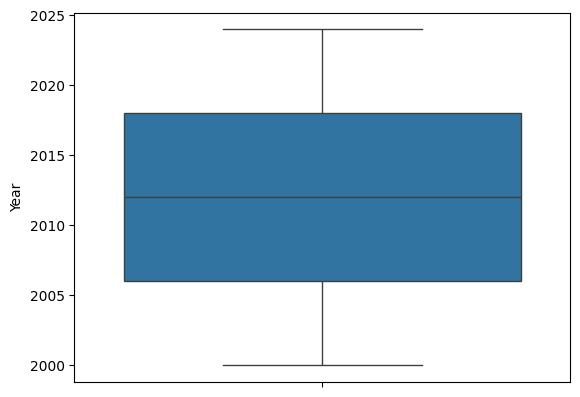

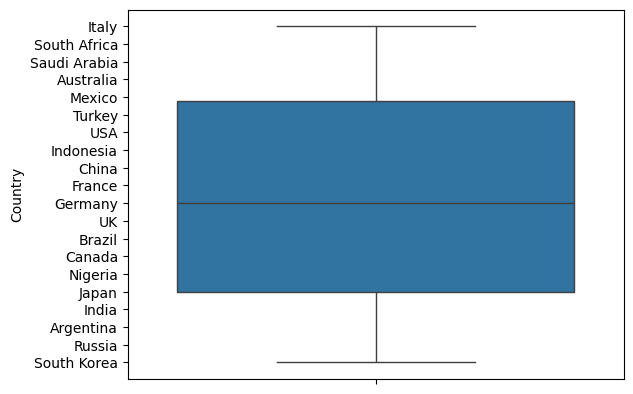

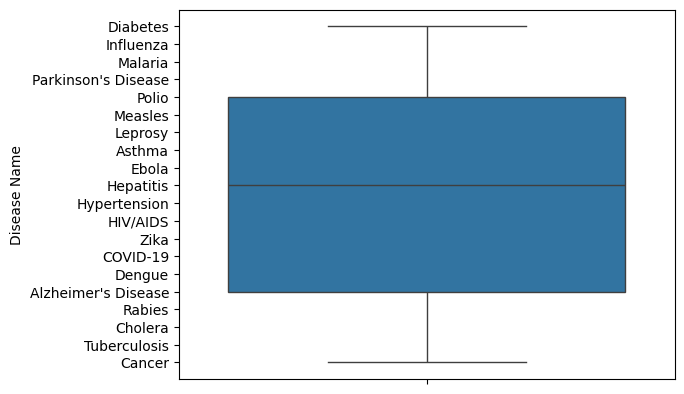

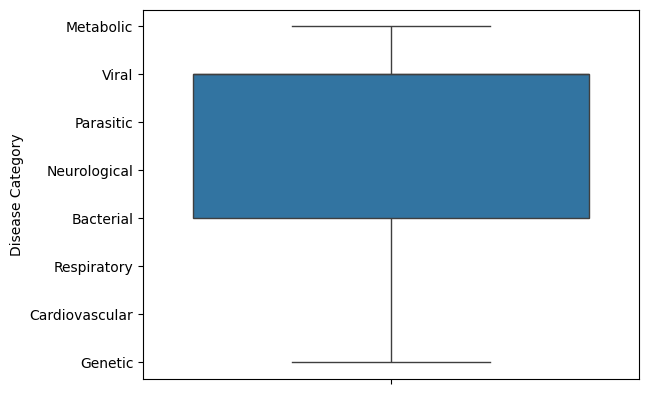

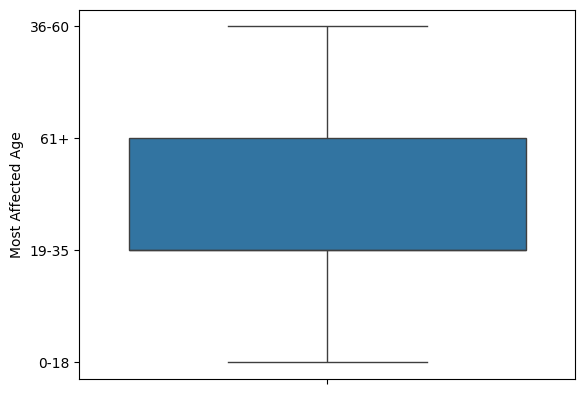

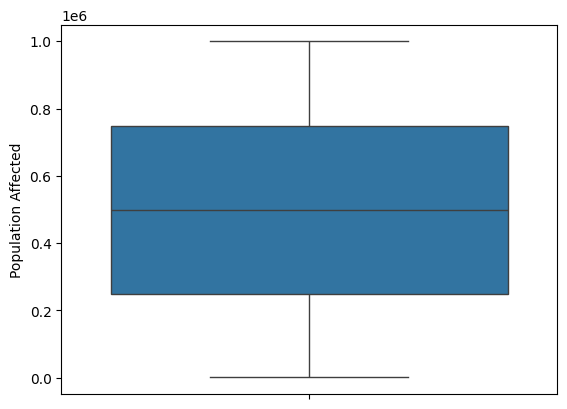

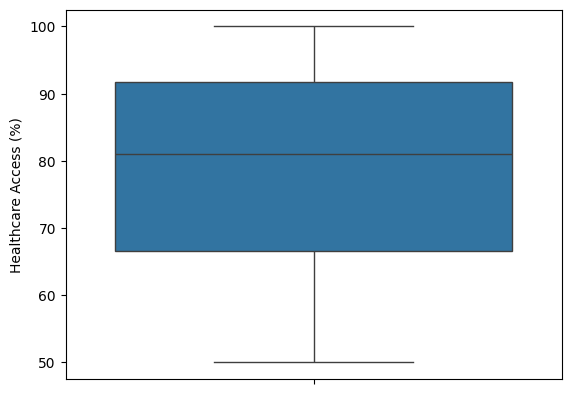

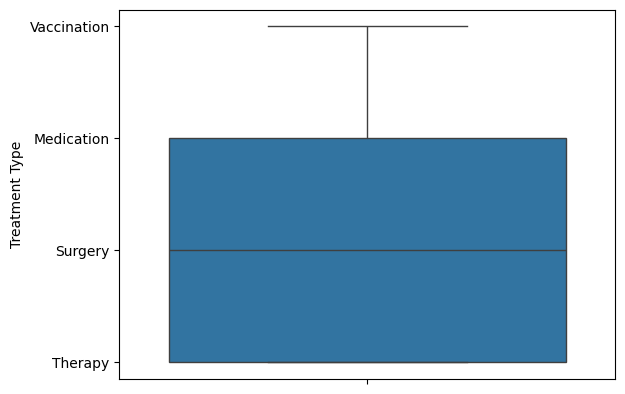

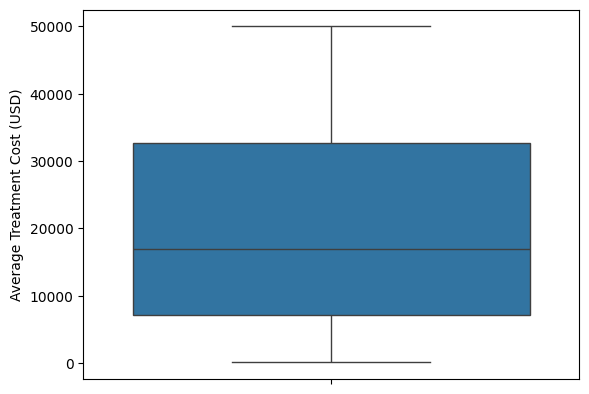

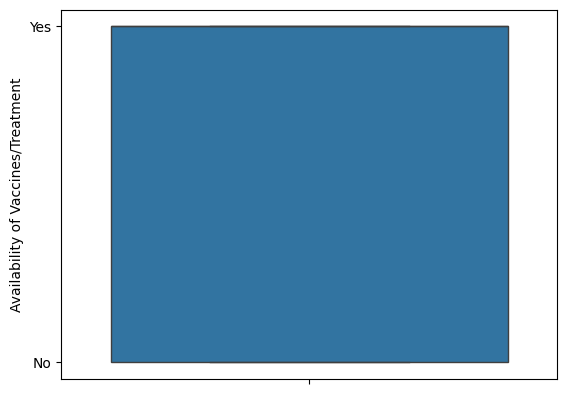

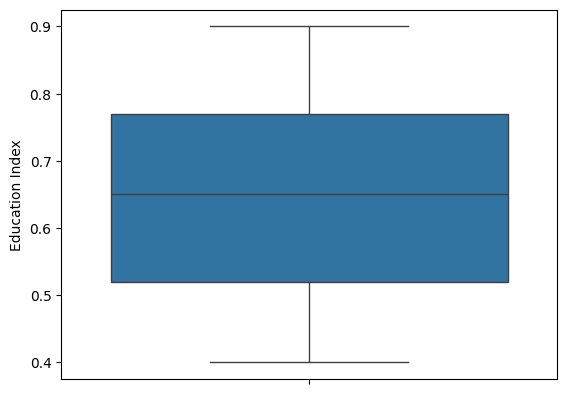

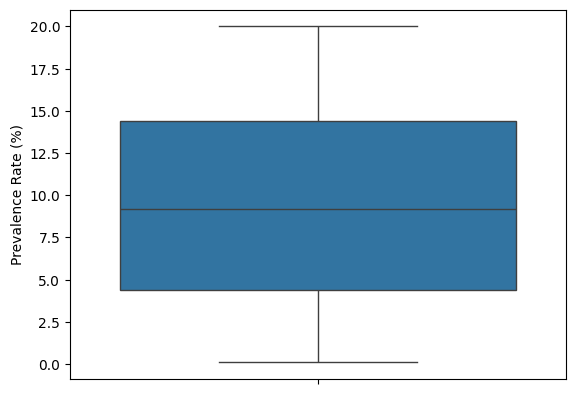

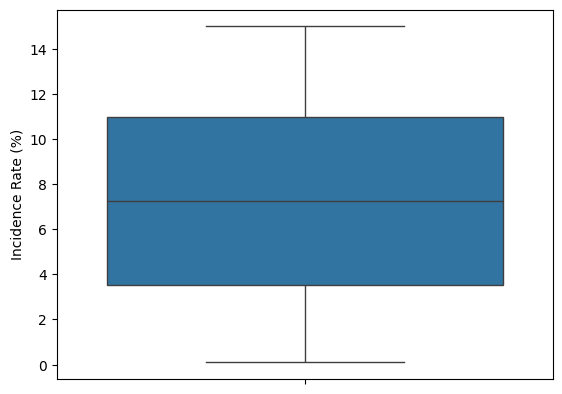

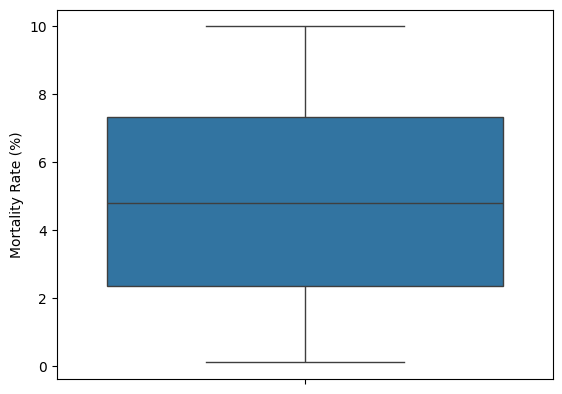

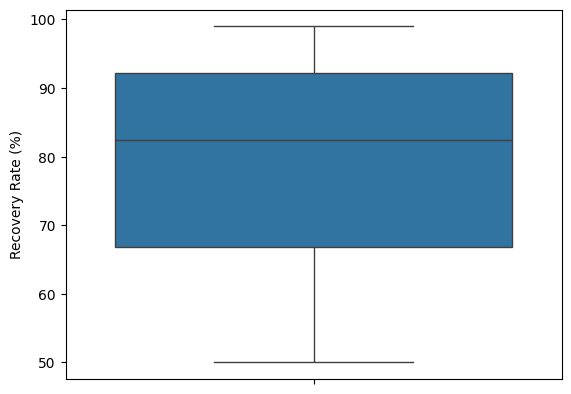

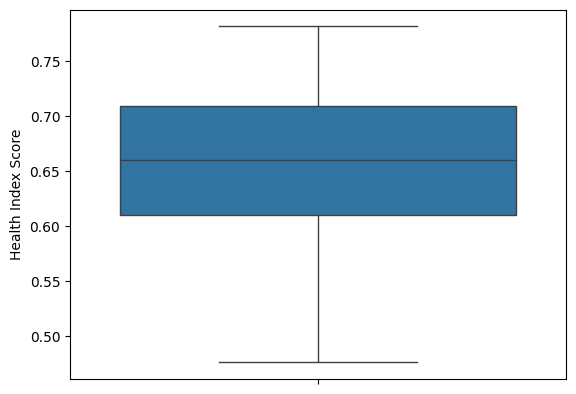

In [ ]:
from scipy import stats
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

**`📊 Saving Refined Data for Insights & Graphs`**

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science/ML PROJECT/PRJCT/For_Vis-Global_HIS.csv',index=False)

In [ ]:
df.to_excel('/content/drive/MyDrive/Data Science/ML PROJECT/PRJCT/For_Vis-Global_HIS.xlsx', index=False)


**`🔢 Encoding Categorical Data (One-Hot & Label Encoding)`**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohec=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohec.fit(df[['Country']])
encountry=ohec.transform(df[['Country']])
dfcountry=pd.DataFrame(encountry,columns=ohec.get_feature_names_out())
df.reset_index(drop=True,inplace=True)
dfcountry.reset_index(drop=True,inplace=True)
df=pd.concat([df,dfcountry],axis=1)
df.drop('Country',axis=1,inplace=True)
df.tail(2)

,Year,Disease Name,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,...,Country_Japan,Country_Mexico,Country_Nigeria,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Turkey,Country_UK,Country_USA
32476,2016,Measles,Viral,36-60,565516.0,62.26,Surgery,48373.0,No,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32477,2018,Parkinson's Disease,Neurological,36-60,441873.0,54.09,Vaccination,1147.0,No,0.48,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ohedn=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohedn.fit(df[['Disease Name']])
endn=ohedn.transform(df[['Disease Name']])
dfdn=pd.DataFrame(endn,columns=ohedn.get_feature_names_out())
df.reset_index(drop=True,inplace=True)
dfdn.reset_index(drop=True,inplace=True)
df=pd.concat([df,dfdn],axis=1)
df.drop('Disease Name',axis=1,inplace=True)
df.tail(2)

,Year,Disease Category,Most Affected Age,Population Affected,Healthcare Access (%),Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),...,Disease Name_Hypertension,Disease Name_Influenza,Disease Name_Leprosy,Disease Name_Malaria,Disease Name_Measles,Disease Name_Parkinson's Disease,Disease Name_Polio,Disease Name_Rabies,Disease Name_Tuberculosis,Disease Name_Zika
32476,2016,Viral,36-60,565516.0,62.26,Surgery,48373.0,No,0.42,13.72,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32477,2018,Neurological,36-60,441873.0,54.09,Vaccination,1147.0,No,0.48,18.07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
ohedc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohedc.fit(df[['Disease Category']])
endc=ohedc.transform(df[['Disease Category']])
dfcategory=pd.DataFrame(endc,columns=ohedc.get_feature_names_out())
df.reset_index(drop=True,inplace=True)
dfcategory.reset_index(drop=True,inplace=True)
df=pd.concat([df,dfcategory],axis=1)
df.drop('Disease Category',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
leage=LabelEncoder()
leage.fit(df['Most Affected Age'])
df['Most Affected Age']=leage.transform(df['Most Affected Age'])

In [ ]:
ohett=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohett.fit(df[['Treatment Type']])
entreatment=ohett.transform(df[['Treatment Type']])
dftreatment=pd.DataFrame(entreatment,columns=ohett.get_feature_names_out())
df.reset_index(drop=True,inplace=True)
dftreatment.reset_index(drop=True,inplace=True)
df=pd.concat([df,dftreatment],axis=1)
df.drop('Treatment Type',axis=1,inplace=True)


In [ ]:
levacc=LabelEncoder()
levacc.fit(df['Availability of Vaccines/Treatment'])
df['Availability of Vaccines/Treatment']=levacc.transform(df['Availability of Vaccines/Treatment'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32478 entries, 0 to 32477
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                32478 non-null  int64  
 1   Most Affected Age                   32478 non-null  int64  
 2   Population Affected                 32478 non-null  float64
 3   Healthcare Access (%)               32478 non-null  float64
 4   Average Treatment Cost (USD)        32478 non-null  float64
 5   Availability of Vaccines/Treatment  32478 non-null  int64  
 6   Education Index                     32478 non-null  float64
 7   Prevalence Rate (%)                 32478 non-null  float64
 8   Incidence Rate (%)                  32478 non-null  float64
 9   Mortality Rate (%)                  32478 non-null  float64
 10  Recovery Rate (%)                   32478 non-null  float64
 11  Health Index Score                  32478

In [ ]:
df.shape

(32478, 64)

In [ ]:
df.tail(3)

,Year,Most Affected Age,Population Affected,Healthcare Access (%),Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),...,Disease Category_Genetic,Disease Category_Metabolic,Disease Category_Neurological,Disease Category_Parasitic,Disease Category_Respiratory,Disease Category_Viral,Treatment Type_Medication,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination
32475,2018,1,238034.0,87.44,44931.0,1,0.43,7.91,10.15,5.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32476,2016,2,565516.0,62.26,48373.0,0,0.42,13.72,11.44,5.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
32477,2018,2,441873.0,54.09,1147.0,0,0.48,18.07,13.27,8.07,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pd.set_option('display.max_rows', None)
corre=df.corr()['Health Index Score']
corre

,Health Index Score
Year,0.008377
Most Affected Age,-0.003178
Population Affected,0.001868
Healthcare Access (%),0.618514
Average Treatment Cost (USD),-0.739770
Availability of Vaccines/Treatment,-0.003424
Education Index,0.004681
Prevalence Rate (%),-0.281894
Incidence Rate (%),-0.141611
Mortality Rate (%),-0.189314


In [ ]:
df.tail(2)

,Year,Most Affected Age,Population Affected,Healthcare Access (%),Average Treatment Cost (USD),Availability of Vaccines/Treatment,Education Index,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),...,Disease Category_Genetic,Disease Category_Metabolic,Disease Category_Neurological,Disease Category_Parasitic,Disease Category_Respiratory,Disease Category_Viral,Treatment Type_Medication,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination
32476,2016,2,565516.0,62.26,48373.0,0,0.42,13.72,11.44,5.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
32477,2018,2,441873.0,54.09,1147.0,0,0.48,18.07,13.27,8.07,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.iloc[45]

,45
Year,2014.000000
Most Affected Age,2.000000
Population Affected,204141.000000
Healthcare Access (%),93.170000
Average Treatment Cost (USD),7116.000000
Availability of Vaccines/Treatment,0.000000
Education Index,0.540000
Prevalence Rate (%),8.270000
Incidence Rate (%),14.430000
Mortality Rate (%),1.320000


#Train-Test Split and Standardization for Model Development

In [ ]:
#dropped columns with least correlation
df.drop(columns=["Most Affected Age", "Population Affected","Availability of Vaccines/Treatment"],axis=1,inplace=True)


In [ ]:
df.drop('Education Index',axis=1,inplace=True)

In [ ]:
df.tail(1)

,Year,Healthcare Access (%),Average Treatment Cost (USD),Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Recovery Rate (%),Health Index Score,Country_Argentina,Country_Australia,...,Disease Category_Genetic,Disease Category_Metabolic,Disease Category_Neurological,Disease Category_Parasitic,Disease Category_Respiratory,Disease Category_Viral,Treatment Type_Medication,Treatment Type_Surgery,Treatment Type_Therapy,Treatment Type_Vaccination
32477,2018,54.09,1147.0,18.07,13.27,8.07,76.45,0.625706,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(32478, 60)

In [ ]:
df.columns

Index(['Year', 'Healthcare Access (%)', 'Average Treatment Cost (USD)',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Recovery Rate (%)', 'Health Index Score', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Indonesia', 'Country_Italy', 'Country_Japan', 'Country_Mexico',
       'Country_Nigeria', 'Country_Russia', 'Country_Saudi Arabia',
       'Country_South Africa', 'Country_South Korea', 'Country_Turkey',
       'Country_UK', 'Country_USA', 'Disease Name_Alzheimer's Disease',
       'Disease Name_Asthma', 'Disease Name_COVID-19', 'Disease Name_Cancer',
       'Disease Name_Cholera', 'Disease Name_Dengue', 'Disease Name_Diabetes',
       'Disease Name_Ebola', 'Disease Name_HIV/AIDS', 'Disease Name_Hepatitis',
       'Disease Name_Hypertension', 'Disease Name_Influenza',
       'Disease Name_Leprosy', 'Disease Name_Malar

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Health Index Score',axis=1)
feature_order = x.columns
y=df['Health Index Score']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
xtrain_scaled = sd.fit_transform(xtrain)
xtest_scaled = sd.transform(xtest)


# Training & Evaluating KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5,metric='euclidean')
knn.fit(xtrain_scaled,ytrain)


KNeighborsRegressor(metric='euclidean')

In [ ]:
ypredknn=knn.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, ypredknn)
mae = mean_absolute_error(ytest, ypredknn)
r2 = r2_score(ytest, ypredknn)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.0012353659520092243
Mean Absolute Error: 0.027801090578817737
R-squared: 0.6708710291973163


In [ ]:
training_score=knn.score(xtrain_scaled,ytrain)
testing_score=knn.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7919666363535158
Testing Score: 0.6708710291973163


The overall R² score is 0.67, indicating moderate performance, but the drop from 0.79 (training) to 0.67 (testing) suggests overfitting, highlighting the need for improvement through hyperparameter tuning or feature selection.

# Hyperparameter Tuning for KNN using RandomizedSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
knn2 = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn2, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='r2',
                                   n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(xtrain_scaled, ytrain)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}


In [ ]:
# Train the best model
best_knn=KNeighborsRegressor(n_neighbors=3,metric='manhattan',weights='distance')
best_knn.fit(xtrain_scaled,ytrain)

# Predict on test data
ypredknn2 = best_knn.predict(xtest_scaled)

# Evaluate performance
mse = mean_squared_error(ytest, ypredknn2)
mae = mean_absolute_error(ytest, ypredknn2)
r2 = r2_score(ytest, ypredknn2)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.0011594134260082905
Mean Absolute Error: 0.02646466604712431
R-squared: 0.6911064717169146


In [ ]:
training_score=best_knn.score(xtrain_scaled,ytrain)
testing_score=best_knn.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.6911064717169146


The overall R² score is 0.69, showing improved performance, but the jump from 1.0 (training) to 0.69 (testing) indicates significant overfitting,

# Training and Evaluating Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain_scaled,ytrain)

DecisionTreeRegressor()

In [ ]:
ypreddec=dt.predict(xtest_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(ytest, ypreddec)
mae = mean_absolute_error(ytest, ypreddec)
r2 = r2_score(ytest, ypreddec)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9.375272629618227e-05
Mean Absolute Error: 0.007550069273399014
R-squared: 0.9750221881494936


In [ ]:
training_score=dt.score(xtrain_scaled,ytrain)
testing_score=dt.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9750221881494936


The overall R² score is 0.97, indicating excellent performance, but the perfect 1.0 (training) to 0.97 (testing) suggests slight overfitting, though the model generalizes well with minimal error.

# Hyperparameter Tuning For Decision Tree using GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt2=DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt2, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(xtrain_scaled, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)





Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Train the model with the best hyperparameters
dtt2=DecisionTreeRegressor(max_depth=6,min_samples_leaf=1,min_samples_split=2)
dtt2.fit(xtrain_scaled,ytrain)

# Make predictions with the tuned model
ypreddec_tuned = dtt2.predict(xtest_scaled)

In [ ]:
# Evaluate the tuned model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_tuned = mean_squared_error(ytest, ypreddec_tuned)
mae_tuned = mean_absolute_error(ytest, ypreddec_tuned)
r2_tuned = r2_score(ytest, ypreddec_tuned)

print("Mean Squared Error:", mse_tuned)
print("Mean Absolute Error:", mae_tuned)
print("R-squared:", r2_tuned)

# Get training and testing scores for the tuned model
training_score_tuned = dtt2.score(xtrain_scaled, ytrain)
testing_score_tuned = dtt2.score(xtest_scaled, ytest)

print(f"Training Score: {training_score_tuned}")
print(f"Testing Score: {testing_score_tuned}")


Mean Squared Error: 0.00024394021086233454
Mean Absolute Error: 0.012341387478755178
R-squared: 0.9350089012831153
Training Score: 0.9380951437307489
Testing Score: 0.9350089012831153


**The overall R² score is 0.93, indicating strong performance with minimal error, and the model generalizes well without overfitting.**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dtt2, xtrain_scaled, ytrain, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.93291603 0.93404979 0.93231984 0.93091223 0.93254895]
Mean CV Score: 0.9325493681817549


**The mean cross-validation score of 0.93 indicates that the model maintains consistent performance across different data splits, confirming its stability and good generalization ability.**

# Training and Evaluating Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain_scaled,ytrain)

RandomForestRegressor()

In [ ]:
ypredr=rf.predict(xtest_scaled)
mse = mean_squared_error(ytest, ypredr)
mae = mean_absolute_error(ytest, ypredr)
r2 = r2_score(ytest, ypredr)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2.4151289095948477e-05
Mean Absolute Error: 0.0038474034128694588
R-squared: 0.9935655593301893


In [ ]:
training_score=rf.score(xtrain_scaled,ytrain)
testing_score=rf.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.999010955395484
Testing Score: 0.9935655593301893


The overall R² score of 0.99 indicates excellent performance with minimal error, but the near-perfect training score suggests the model might be slightly memorizing patterns, though it still generalizes well.

# Hyperparameter Tuning for Random Forest Regressor using RandomizedSearchCv

In [ ]:
from scipy.stats import randint as sp_randint
clff = RandomForestRegressor()
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 7, 9],
    'max_features': sp_randint(3, 7),
    'min_samples_split': sp_randint(2, 6),
    'criterion': ['squared_error', 'poisson']
}

randomcv = RandomizedSearchCV(clff, param_distributions=params, cv=5, random_state=42,error_score='raise')
randomcv.fit(xtrain_scaled, ytrain)

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [5, 7, 9],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783c23eaae10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783c23f33710>,
                                        'n_estimators': [10, 20, 30]},
                   random_state=42)

In [ ]:
 randomcv.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_split': 4,
 'n_estimators': 10}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc1=RandomForestRegressor(n_estimators=10,max_depth=9,max_features=6,criterion='poisson',min_samples_split=4)
rfc1.fit(xtrain_scaled,ytrain)

RandomForestRegressor(criterion='poisson', max_depth=9, max_features=6,
                      min_samples_split=4, n_estimators=10)

In [ ]:
ypreddd=rfc1.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypreddd))
print(mean_squared_error(ytest,ypreddd))
print(r2_score(ytest,ypreddd))

0.018177449661436584
0.0005137294207608774
0.8631310542021285


In [ ]:
training_score=rfc1.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=rfc1.score(xtest_scaled,ytest)
print(testing_score)

0.8780243137804595
0.8631310542021285


In [ ]:
cv_scores = cross_val_score(rfc1, xtrain_scaled, ytrain, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.85278768 0.8455179  0.8092823  0.80589588 0.78351938]
Mean CV Score: 0.8194006280889733


The overall R² score is 0.86, showing good performance, and the mean cross-validation score of 0.82 indicates some variability in performance across different data splits.

# Training and Evaluating Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_scaled,ytrain)

LinearRegression()

In [ ]:
ypredlre=lr.predict(xtest_scaled)
ypredlre

array([0.67780031, 0.70118188, 0.49665084, ..., 0.70459537, 0.71199159,
       0.71786027])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(ytest,ypredlre))
print(mean_squared_error(ytest,ypredlre))
print(r2_score(ytest,ypredlre))

0.0001300474285172176
1.464641097534359e-07
0.9999609787030116


In [ ]:
training_score=lr.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=lr.score(xtest_scaled,ytest)
print(testing_score)

0.9998480741876029
0.9999609787030116


Since both the training (0.9998) and testing (0.9999) scores are extremely close to 1, the model might be memorizing patterns rather than generalizing, which could indicate overfitting.

# Training and Evaluating AdaBoost Regressor (Decision Tree)

In [ ]:

from  sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),n_estimators=50)
print(adaboost.estimator)

DecisionTreeRegressor(max_depth=6)


In [ ]:
adaboost.fit(xtrain_scaled,ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6))

In [ ]:
ypredada1=adaboost.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypredada1))
print(mean_squared_error(ytest,ypredada1))
print(r2_score(ytest,ypredada1))

0.006387597125512397
6.383874886249513e-05
0.9829919371856809


In [ ]:
training_score=adaboost.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=adaboost.score(xtest_scaled,ytest)
print(testing_score)

0.9846402278872918
0.9829919371856809


Since both the training (0.9846) and testing (0.9830) scores are very close to 1, there is a possibility that the model is memorizing patterns rather than truly generalizing.

# Trainig and Evaluating Adaboost Regressor (Linear Regression)

In [ ]:
adaboost2=AdaBoostRegressor(estimator=LinearRegression(),n_estimators=50)
adaboost2.fit(xtrain_scaled,ytrain)


AdaBoostRegressor(estimator=LinearRegression())

In [ ]:
ypredada2=adaboost2.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypredada2))
print(mean_squared_error(ytest,ypredada2))
print(r2_score(ytest,ypredada2))

0.002730808567184525
1.68871587655803e-05
0.995500885243553


In [ ]:
training_score=adaboost2.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=adaboost2.score(xtest_scaled,ytest)
print(testing_score)

0.9953953362479345
0.995500885243553


Since both the training (0.9954) and testing (0.9955) scores are extremely close to 1, there is a chance that the model is memorizing patterns rather than truly generalizing.

# Training and Evaluating SVM Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr3=SVR(kernel='poly')
svr3.fit(xtrain_scaled,ytrain)

SVR(kernel='poly')

In [ ]:
ypred4=svr3.predict(xtest_scaled)
ypred4

array([0.63967471, 0.64092048, 0.59966154, ..., 0.64060873, 0.64498308,
       0.64955172])

In [ ]:
print(mean_absolute_error(ytest,ypred4))
print(mean_squared_error(ytest,ypred4))
print(r2_score(ytest,ypred4))


0.04629913141508965
0.002929015656054936
0.21964507215501594


The overall R² score of 0.22 indicates poor performance, suggesting that the model struggles to capture the underlying patterns in the data

# Saving and Loading Models with Pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(dtt2,open('MODEL_DTT2.sav','wb'))


In [ ]:
pickle.dump(sd,open('SD1_DT.sav','wb'))
pickle.dump(ohec,open('OHEC1_DT.sav','wb'))
pickle.dump(ohedn,open('OHEDN1_DT.sav','wb'))
pickle.dump(ohedc,open('OHEDC1_DT.sav','wb'))
pickle.dump(leage,open('LEAG1_DT.sav','wb'))
pickle.dump(ohett,open('OHETT1_DT.sav','wb'))
pickle.dump(levacc,open('LEVACC1_DT.sav','wb'))


In [ ]:
pickle.dump(feature_order, open("FEATURE_ORDER_DT.sav", "wb"))

In [ ]:
pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.3
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.0
astropy-iers-data                  0.2025.2.3.0.32.42
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread            